# 2019 Expert Vs Fan Accuracy



#### Analysis of 2019 data including determining whether experts or fans were more accurate, position breakdowns, and booms and busts.


**Question 1:** In the 2019 Fantasy Football Season, were experts or fans better at predicting final season points?

**Steps:**

A. Create data frames by position of the top 25 predicted players

B. View scatter plot of expert vs fan

C. Find the correlation between FantasyPoints, ExpertRanking and the reranked ADP

D. Create a data frame based on these correlations

E. Plot this data frame in a bar chart

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reads in data

merged_2019_df = pd.read_csv('../data/cleaned/actual_and_projected_2019.csv')

In [3]:
#Creates dataframes by position of the top 25 predicted players

wr_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("WR")].sort_values(by=['ADP_rerank']).iloc[:25]
rb_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("RB")].sort_values(by=['ADP_rerank']).iloc[:25]
qb_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("QB")].sort_values(by=['ADP_rerank']).iloc[:25]
te_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("TE")].sort_values(by=['ADP_rerank']).iloc[:25]

In [4]:
te_2019_df.head()

,Player,ExpertRanking,ADP,Pos,FantasyPoints,ADP_rerank
13,Travis Kelce,1,20.0,TE,254.3,1
34,Zach Ertz,3,29.0,TE,213.6,2
30,George Kittle,2,31.0,TE,222.5,3
48,O.J. Howard,4,55.0,TE,83.9,4
54,Evan Engram,5,61.0,TE,109.4,5


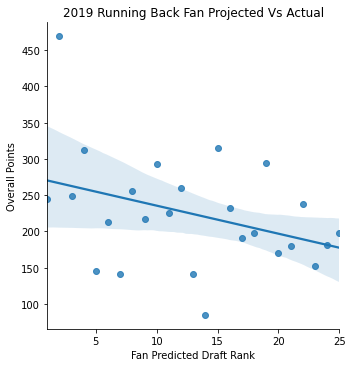

In [5]:
ax = sns.lmplot(x = 'ADP_rerank', y = "FantasyPoints", data = rb_2019_df)
ax.set(xlabel='Fan Predicted Draft Rank', ylabel='Overall Points', title = "2019 Running Back Fan Projected Vs Actual")

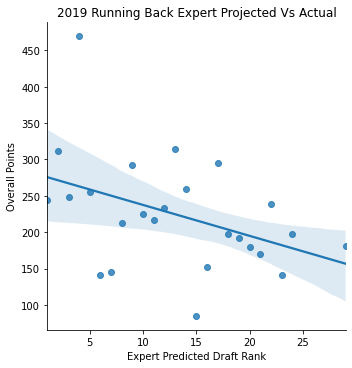

In [6]:
ax = sns.lmplot(x = 'ExpertRanking', y = "FantasyPoints", data = rb_2019_df)
ax.set(xlabel='Expert Predicted Draft Rank', ylabel='Overall Points', title = "2019 Running Back Expert Projected Vs Actual")

In [7]:
#Correlate FantasyPoints, ExpertRanking and the reranked ADP

qb_corr_2019_df = qb_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
rb_corr_2019_df = rb_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
wr_corr_2019_df = wr_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()
te_corr_2019_df = te_2019_df[['FantasyPoints',"ExpertRanking", 'ADP_rerank']].corr().abs()

In [8]:
#Creates dataframe for correlations

corr_2019_data = {'expert_correlation':[qb_corr_2019_df["ExpertRanking"]["FantasyPoints"], 
        rb_corr_2019_df["ExpertRanking"]["FantasyPoints"], wr_corr_2019_df["ExpertRanking"]["FantasyPoints"], 
        te_corr_2019_df["ExpertRanking"]["FantasyPoints"]] , 'fan_correlation': [qb_corr_2019_df["ADP_rerank"]["FantasyPoints"], 
        rb_corr_2019_df["ADP_rerank"]["FantasyPoints"], wr_corr_2019_df["ADP_rerank"]["FantasyPoints"], 
        te_corr_2019_df["ADP_rerank"]["FantasyPoints"]]}

combined_corr_2019_df = pd.DataFrame(corr_2019_data, index =['QB', 'RB', 'WR', 'TE']) 
combined_corr_2019_df

,expert_correlation,fan_correlation
QB,0.377159,0.311206
RB,0.422486,0.368580
WR,0.421757,0.228291
TE,0.235240,0.239627


<AxesSubplot:title={'center':'Correlation by Position for 2019'}, xlabel='Position', ylabel='Correlation'>

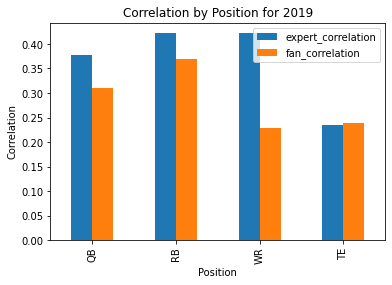

In [9]:
combined_corr_2019_df.plot(kind = "bar", ylabel = "Correlation", xlabel = "Position", title = "Correlation by Position for 2019")

**Answer:**

In the 2019 Fantasy Football year, experts were slightly better at predicting points for quarterbacks and running back and significantly better at predicting wide receivers. However, fans and experts had very similar prediction success for tight ends.

**Observations/Interpretations:**

It is interesting to see that correlation was much higher for the QB, RB, and WR positions. If this holds up in earlier years, this would imply that following the experts and fans recommendation for a TE is not as necessary. 

**Question 2:**

What position were fans and experts best at predicting?

**Steps:**

A. Find average correlation from both fans and experts

B. Input this into data frame

C. Plot this into data frame

In [10]:
#Find average correlation from both fans and experts
average_correlation = (combined_corr_2019_df["expert_correlation"] + combined_corr_2019_df["fan_correlation"]) / 2.0

In [11]:
#Input into data frame

combined_corr_2019_df["average_correlation"] = average_correlation

In [12]:
combined_corr_2019_df

,expert_correlation,fan_correlation,average_correlation
QB,0.377159,0.311206,0.344182
RB,0.422486,0.368580,0.395533
WR,0.421757,0.228291,0.325024
TE,0.235240,0.239627,0.237433


<AxesSubplot:title={'center':'Average Correlation by Position for 2019'}, xlabel='Position', ylabel='Correlation'>

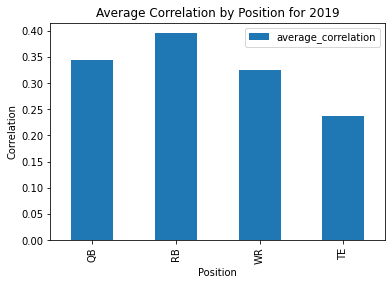

In [13]:
combined_corr_2019_df.plot(kind = "bar", y = "average_correlation", ylabel = "Correlation", xlabel = "Position", title = "Average Correlation by Position for 2019")

**Answer:**

Experts and fans are best at predicting the running back position, followed by quarterback, wide receiver, and tight end.

**Observations/Interpretations:**

All of the correlations were fairly close with tight ends lagging a bit behind. I could easily see this statistic changing based on the year.

**Question 3:**

How often were players in each position busts (scored significantly less than average)?

**Steps:**

A. Find average of points of top 25 predicted players in each position

B. Count player that scored less than 50% below mean

C. Find percentage

D. Create data frame for plotting

E. Plot this data frame in charts

In [14]:
#Finds average of points of top 25 predicted players in each position

qb_2019_mean = qb_2019_df["FantasyPoints"].mean()
rb_2019_mean = rb_2019_df["FantasyPoints"].mean()
wr_2019_mean = wr_2019_df["FantasyPoints"].mean()
te_2019_mean = te_2019_df["FantasyPoints"].mean()

In [15]:
#Count player that scored less than 1 standard deviation from mean

qb_2019_below_mean = float(qb_2019_df[qb_2019_df["FantasyPoints"] <= qb_2019_mean - qb_2019_mean/2].shape[0])
rb_2019_below_mean = float(rb_2019_df[rb_2019_df["FantasyPoints"] <= rb_2019_mean - rb_2019_mean/2].shape[0])
wr_2019_below_mean = float(wr_2019_df[wr_2019_df["FantasyPoints"] <= wr_2019_mean - wr_2019_mean/2].shape[0])
te_2019_below_mean = float(te_2019_df[te_2019_df["FantasyPoints"] <= te_2019_mean - te_2019_mean/2].shape[0])

In [16]:
#Finds percentage

qb_2019_below_mean_percentage = qb_2019_below_mean / 25.0 * 100
rb_2019_below_mean_percentage = rb_2019_below_mean / 25.0 * 100
wr_2019_below_mean_percentage = wr_2019_below_mean / 25.0 * 100
te_2019_below_mean_percentage = te_2019_below_mean / 25.0 * 100

In [17]:
#Creates data frame for plotting

compare_to_average_2019_df = pd.DataFrame({"bust_percentage": [qb_2019_below_mean_percentage, rb_2019_below_mean_percentage
                                                 , wr_2019_below_mean_percentage, te_2019_below_mean_percentage]}
                                                 , index =['QB', 'RB', 'WR', 'TE']) 
compare_to_average_2019_df

,bust_percentage
QB,16.0
RB,4.0
WR,8.0
TE,12.0


<AxesSubplot:title={'center':'Amount of Busts by Position for 2019'}, xlabel='Position', ylabel='Bust Percentage'>

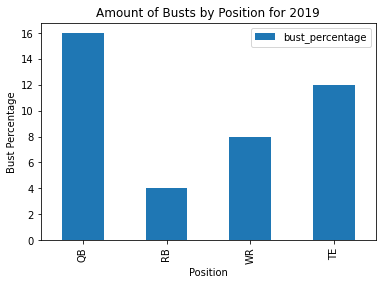

In [18]:
#Plots this data frame in a bar chart

compare_to_average_2019_df.plot(kind = "bar", y = "bust_percentage", ylabel = "Bust Percentage", xlabel = "Position", title = "Amount of Busts by Position for 2019")

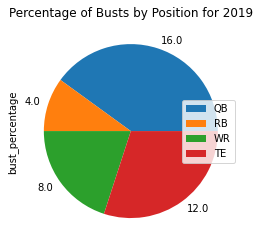

In [19]:
#Plots this data frame in a pie chart

compare_to_average_2019_df.plot(kind = "pie", y = "bust_percentage", title = "Percentage of Busts by Position for 2019", labels = compare_to_average_2019_df["bust_percentage"])
plt.legend(["QB", "RB", "WR", "TE"] ,loc=5)

**Answer:**

In the 2019 Fantasy Football year, top 25 predicted players had the most busts in the QB position, with 16 percent. This was followed by TEs with 16, WRs with 8 percent, and then TEs with 4 percent.

**Observations/Interpretations:**

It is interesting to see that the greatest amount of busts came from the qb position. As we saw, from the previous charts experts were better at predicting WRs and RBs, which had the lowest bust percentage, while worst at QBs and TEs, which had the highest bust percentage. It seems as if these busts could cause them to be less accurate.

**Question 4:**

How often were players did players in each position boom (scored significantly more than average)?

**Steps:**

A. Count player that scored more than 1 standard deviation from mean

B. Find percentage

E. Add this data to data frame

F. Plot this data in charts

In [20]:
#Count player that scored more than 1 standard deviation from mean

qb_2019_above_mean = float(qb_2019_df[qb_2019_df["FantasyPoints"] >= qb_2019_mean + qb_2019_mean/2].shape[0])
rb_2019_above_mean = float(rb_2019_df[rb_2019_df["FantasyPoints"] >= rb_2019_mean + rb_2019_mean/2].shape[0])
wr_2019_above_mean = float(wr_2019_df[wr_2019_df["FantasyPoints"] >= wr_2019_mean + wr_2019_mean/2].shape[0])
te_2019_above_mean = float(te_2019_df[te_2019_df["FantasyPoints"] >= te_2019_mean + te_2019_mean/2].shape[0])

In [21]:
#Finds percentage

qb_2019_above_mean_percentage = qb_2019_above_mean / 25.0 * 100
rb_2019_above_mean_percentage = rb_2019_above_mean / 25.0 * 100
wr_2019_above_mean_percentage = wr_2019_above_mean / 25.0 * 100
te_2019_above_mean_percentage = te_2019_above_mean / 25.0 * 100

In [22]:
#Add this data to data frame

compare_to_average_2019_df["boom_percentage"] = [qb_2019_above_mean_percentage, rb_2019_above_mean_percentage
                                                 , wr_2019_above_mean_percentage, te_2019_above_mean_percentage]
compare_to_average_2019_df

,bust_percentage,boom_percentage
QB,16.0,4.0
RB,4.0,4.0
WR,8.0,4.0
TE,12.0,20.0


<AxesSubplot:title={'center':'Amount of Booms by Position for 2019'}, xlabel='Position', ylabel='Boom Percentage'>

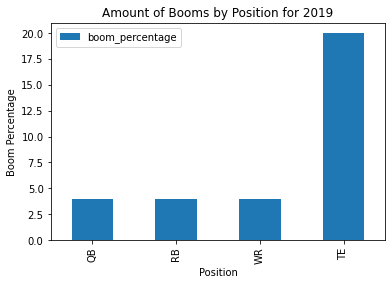

In [23]:
#Plots this data frame in a bar chart

compare_to_average_2019_df.plot(kind = "bar", y = "boom_percentage", ylabel = "Boom Percentage", xlabel = "Position", title = "Amount of Booms by Position for 2019")

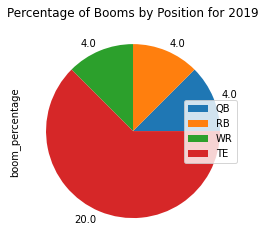

In [24]:
#Plots this data frame in a pie chart

compare_to_average_2019_df.plot(kind = "pie", y = "boom_percentage", title = "Percentage of Booms by Position for 2019", labels = compare_to_average_2019_df["boom_percentage"])
plt.legend(["QB", "RB", "WR", "TE"] ,loc=5)

**Answer:**

In the 2019 Fantasy Football year, top 25 predicted players had the most booms in the tight end position, with 20 percent. All other positions had only 4%.

**Observations/Interpretations:**

This could be another reasons why fans and experts had trouble predicting TEs. Some TEs scored significantly more than the mean, while this was very uncommon for other positions. For both booms and busts, TEs were high in percentage, making them more difficult to project.

**Question 5:**

Did experts and fans tend to agree on who they believed the top 5 picks should be?

In [25]:
#Creates dataframes by position of the top 25 predicted players

wr_top5_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("WR")].sort_values(by=['ADP_rerank']).iloc[:5]
rb_top5_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("RB")].sort_values(by=['ADP_rerank']).iloc[:5]
qb_top5_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("QB")].sort_values(by=['ADP_rerank']).iloc[:5]
te_top5_2019_df = merged_2019_df[merged_2019_df["Pos"].str.contains("TE")].sort_values(by=['ADP_rerank']).iloc[:5]

In [26]:
#Correlate FantasyPoints, ExpertRanking and the reranked ADP

qb_corr_top5_2019_df = qb_top5_2019_df[["ExpertRanking", 'ADP_rerank']].corr().abs()
rb_corr_top5_2019_df = rb_top5_2019_df[["ExpertRanking", 'ADP_rerank']].corr().abs()
wr_corr_top5_2019_df = wr_top5_2019_df[["ExpertRanking", 'ADP_rerank']].corr().abs()
te_corr_top5_2019_df = te_top5_2019_df[["ExpertRanking", 'ADP_rerank']].corr().abs()

In [27]:
#Creates dataframe for correlations

corr_top5_2019_data = {'correlation':[qb_corr_2019_df["ExpertRanking"]["ADP_rerank"], 
        rb_corr_2019_df["ExpertRanking"]["ADP_rerank"], wr_corr_2019_df["ExpertRanking"]["ADP_rerank"], 
        te_corr_2019_df["ExpertRanking"]["ADP_rerank"]]}

combined_corr_top5_2019_df = pd.DataFrame(corr_top5_2019_data, index =['QB', 'RB', 'WR', 'TE']) 
combined_corr_top5_2019_df

,correlation
QB,0.968731
RB,0.911751
WR,0.905068
TE,0.960887


<AxesSubplot:title={'center':'Correlation Between Expert and Fan Top 5 Picks for 2019'}, xlabel='Position', ylabel='Correlation'>

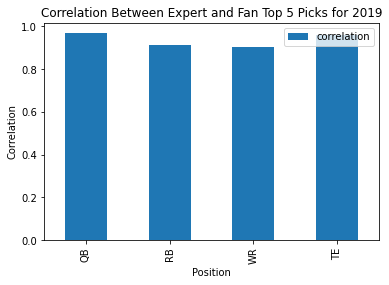

In [28]:
combined_corr_top5_2019_df.plot(kind = "bar", ylabel = "Correlation", xlabel = "Position", title = "Correlation Between Expert and Fan Top 5 Picks for 2019")

**Answer:**

All positions had a high correlation between fans and experts with the QB position at the highest with .97, and WR position the lowest with .91.

**Observations/Interpretations:**

The experts and fans tend to agree highly when it comes to the first few picks in each position. It seems as if the predictions become more disagreeable further into the fantasy drafts. Based on the data from this year, it seems to not matter too much who you follow for the first few picks as they are very similar, but the experts make the more accurate picks for the later players.